## Analysis of Bitcoin Market Sentiment and Trader Performance

This notebook analyzes the provided "Bitcoin Market Sentiment Dataset" and "Historical Trader Data from Hyperliquid" to explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.


**Step Taken**

1.  ## **Data Loading and Initial Inspection:**
    *   Loaded the `fear_greed_index.csv` dataset into a pandas DataFrame named `Fear_Greed`.
    *   Loaded the `historical_data.csv` dataset into a pandas DataFrame named `historical`.
    *   Displayed the head of both DataFrames to get a glimpse of their structure and content.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Fear_Greed = pd.read_csv('/content/fear_greed_index.csv')

In [ ]:
historical = pd.read_csv('/content/historical_data.csv')

In [ ]:
Fear_Greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
Fear_Greed.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [155]:
historical.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


2.  ## **Data Preprocessing and Merging:**
    *   Converted the 'Timestamp IST' column in the `historical` DataFrame to a datetime format.
    *   Created a new 'Date' column in the `historical` DataFrame containing only the date part for merging purposes.
    *   Converted the 'date' column in the `Fear_Greed` DataFrame to a datetime format and renamed it to 'Date'.
    *   Merged the `historical` and `Fear_Greed` DataFrames on the 'Date' column using a left merge to combine trader data with sentiment information.
    *   Dropped unnecessary columns from the merged DataFrame (`merged_df`) to streamline the dataset.


In [156]:
# Convert 'Timestamp IST' in historical_df to datetime format
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'] , format = '%d-%m-%Y %H:%M')

In [157]:
historical['Timestamp IST']

,Timestamp IST
0,2024-12-02 22:50:00
1,2024-12-02 22:50:00
2,2024-12-02 22:50:00
3,2024-12-02 22:50:00
4,2024-12-02 22:50:00
...,...
211219,2025-04-25 15:35:00
211220,2025-04-25 15:35:00
211221,2025-04-25 15:35:00
211222,2025-04-25 15:35:00


In [158]:
# Create a new 'Date' column for merging (only date part) and convert to datetime
historical['Date'] = pd.to_datetime(historical['Timestamp IST'].dt.date)

In [159]:
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02


In [160]:
# Convert 'date' in fear_greed_df to datetime.date format for matching
Fear_Greed['Date'] = pd.to_datetime(Fear_Greed['date'])

In [161]:
# Merge on date
merged_df = pd.merge(historical, Fear_Greed[['Date', 'classification']], on='Date' , how='left')

In [162]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


3. ## **Initial Exploratory Data Analysis:**
    *   Examined the value counts of 'Timestamp IST', 'Date', and 'classification' in the merged DataFrame.
    * Drop unecessay columns.
    *   Generated descriptive statistics for the merged DataFrame to understand the distribution and characteristics of the data.
    *   Created a 'Profit_Status' column in `merged_df` to categorize trades as 'Profit' or 'Loss' based on 'Closed PnL'.
    *   Displayed the value counts of the 'Profit_Status' column.


In [163]:
merged_df[['Timestamp IST', 'Date', 'classification']].value_counts()

,,,count
Timestamp IST,Date,classification,
2025-02-14 00:31:00,2025-02-14,Neutral,441
2025-02-25 05:23:00,2025-02-25,Fear,432
2025-03-07 20:39:00,2025-03-07,Fear,376
2025-03-03 12:25:00,2025-03-03,Fear,366
2025-02-24 13:36:00,2025-02-24,Neutral,359
...,...,...,...
2025-02-20 08:49:00,2025-02-20,Neutral,1
2025-02-20 08:46:00,2025-02-20,Neutral,1
2025-02-20 08:41:00,2025-02-20,Neutral,1


In [164]:
#Drop unnecessary columns
merged_df.drop(columns=[
    'Timestamp', 'Transaction Hash', 'Order ID', 'Trade ID', 'Crossed', 'Fee'
], axis =1 ,  inplace=True, errors='ignore') # errors='ignore' to avoid errors if any column is missing

In [165]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,2025-04-25,Greed


In [166]:
#This helps us answer questions like: Do traders make more money on average during fearful periods or greedy periods?
merged_df.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [167]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Date', 'classification']


In [168]:
# Exploring Sentiment and Trader Behavior
merged_df.groupby('classification')['Side'].value_counts(normalize=True)*100

classification  Side
Extreme Fear    BUY     51.098131
                SELL    48.901869
Extreme Greed   SELL    55.141028
                BUY     44.858972
Fear            SELL    51.048725
                BUY     48.951275
Greed           SELL    51.144067
                BUY     48.855933
Neutral         BUY     50.334342
                SELL    49.665658
Name: proportion, dtype: float64

In [169]:
#Create new column to anylsis better (Optional but Powerful)
merged_df['Profit_Status'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

In [170]:
merged_df.Profit_Status.value_counts()

,count
Profit_Status,
Loss,124355
Profit,86869


4. ## **Analyzing Sentiment and Trader Behavior:**
    *   Calculated the average 'Closed PnL' grouped by 'classification' to see how profitability varies across different sentiment levels.
    *   Examined the distribution of 'Side' (BUY/SELL) within each 'classification' to understand trading behavior during different sentiment periods.
    *   Visualized the distribution of 'Closed PnL' by sentiment using a box plot.
    *   **Visualized the average 'Closed PnL' by sentiment using a bar chart.**
    *   Visualized the count of 'Side' by sentiment using a count plot.
    *   Visualized the count of 'Profit_Status' by sentiment using a count plot.
    *   **Visualized the average 'Size Tokens' and 'Size USD' by sentiment using bar charts.**
    *   Visualized the total trades by sentiment using a bar chart.
    *   Visualized the number of unique traders by sentiment using a bar chart.
    *  **Visualized the scatterplot of classification over time**.
    *   Generated a heatmap to visualize the correlation between 'Closed PnL', 'Size USD', 'Size Tokens', and 'Execution Price'.
    *   Calculated the percentage of profitable trades within each sentiment classification.
    *   Calculated the average 'Closed PnL' grouped by 'Side' and 'classification'.

These steps have provided initial insights into the relationship between market sentiment and trader performance, laying the groundwork for further analysis and the identification of potential trading strategies.

In [171]:
merged_df.describe(include = 'all')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Date,classification,Profit_Status
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,211218,211224
unique,32,246,NaN,NaN,NaN,2,NaN,NaN,12,NaN,NaN,5,2
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Long,NaN,NaN,Fear,Loss
freq,40184,68005,NaN,NaN,NaN,108528,NaN,NaN,49895,NaN,NaN,61837,124355
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,2025-01-31 12:04:22.915009792,-2.994625e+04,NaN,48.749001,2025-01-30 23:54:28.674013952,NaN,NaN
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,2023-05-01 01:06:00,-1.433463e+07,NaN,-117990.104100,2023-05-01 00:00:00,NaN,NaN
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,2024-12-31 21:00:45,-3.762311e+02,NaN,0.000000,2024-12-31 00:00:00,NaN,NaN
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,2025-02-24 18:55:00,8.472793e+01,NaN,0.000000,2025-02-24 00:00:00,NaN,NaN
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,2025-04-02 18:22:00,9.337278e+03,NaN,5.792797,2025-04-02 00:00:00,NaN,NaN
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,2025-05-01 12:13:00,3.050948e+07,NaN,135329.090100,2025-05-01 00:00:00,NaN,NaN


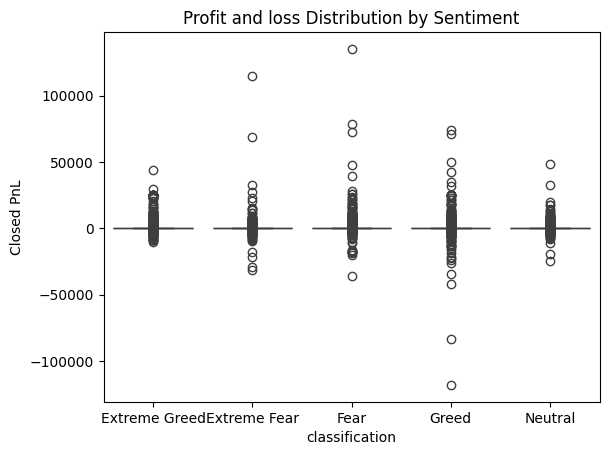

In [172]:
#Box plot , it help to analyze Profit and loss distribution by sentiments
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Profit and loss Distribution by Sentiment')
plt.show()

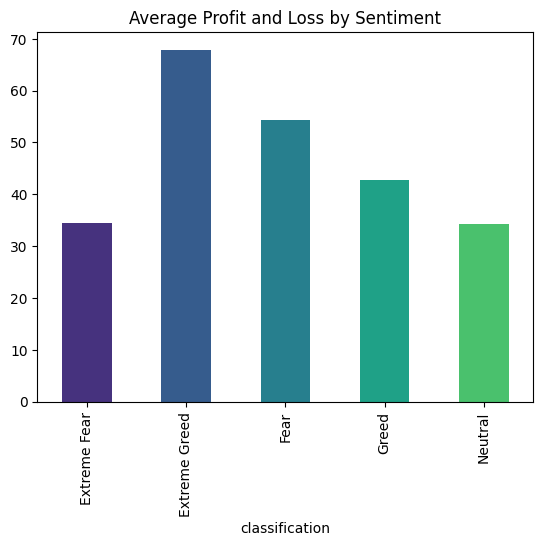

In [195]:
#Average profit and loss sentiments
merged_df.groupby('classification')['Closed PnL'].mean().plot(kind='bar' ,  color=sns.color_palette('viridis'))
plt.title('Average Profit and Loss by Sentiment')
plt.show()

<Axes: xlabel='classification', ylabel='count'>

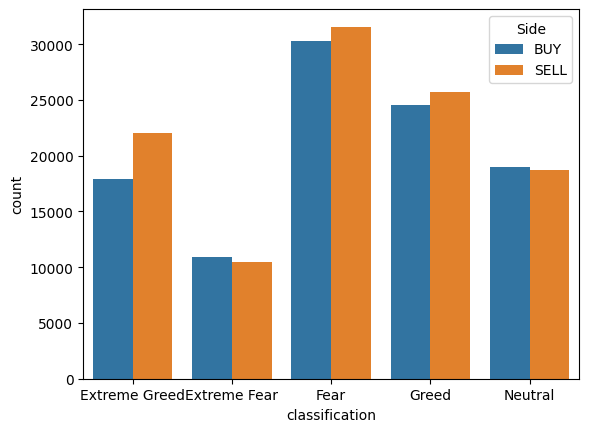

In [174]:
#BUY and SEll over classifications
sns.countplot(data=merged_df, x='classification', hue='Side')

<Axes: xlabel='classification', ylabel='count'>

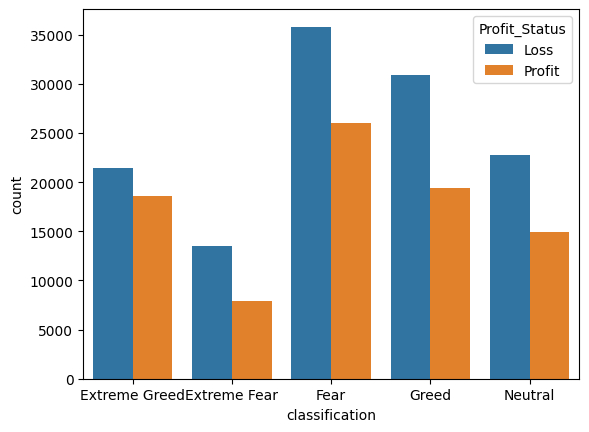

In [175]:
#Profit and loss over classification
sns.countplot(data=merged_df, x='classification', hue='Profit_Status')

In [176]:
merged_df.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Date,classification,Profit_Status
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.0,Buy,0.0,2024-12-02,Extreme Greed,Loss


<Axes: xlabel='classification'>

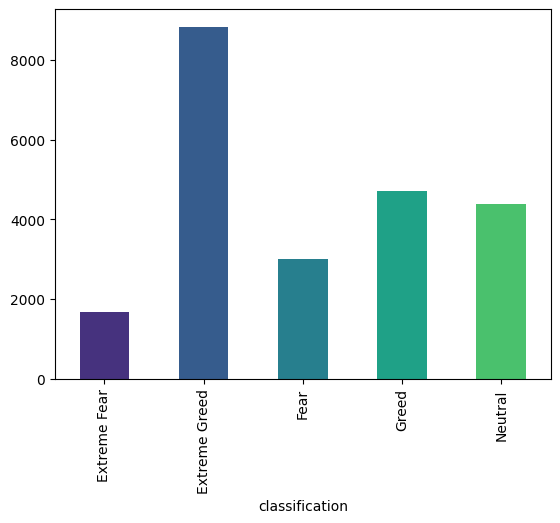

In [196]:
merged_df.groupby('classification')['Size Tokens'].mean().plot(kind='bar' , color=sns.color_palette('viridis'))

<Axes: xlabel='classification'>

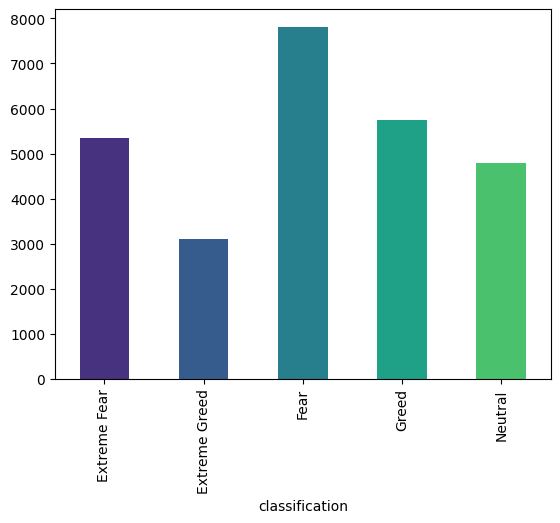

In [200]:
merged_df.groupby('classification')['Size USD'].mean().plot(kind='bar' , color=sns.color_palette('viridis'))

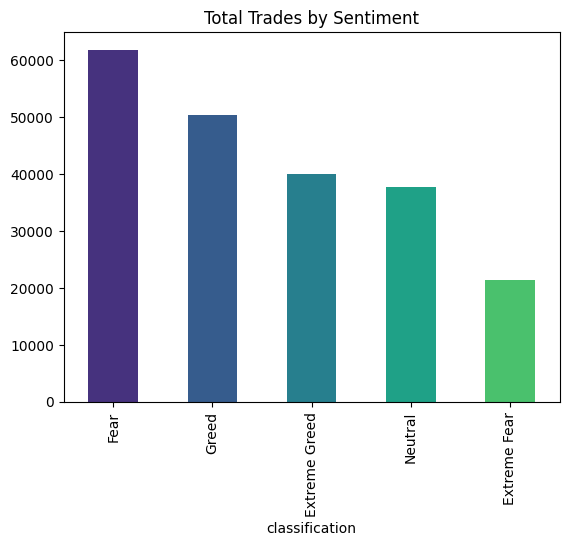

In [198]:
# Total trades
merged_df['classification'].value_counts().plot(kind='bar', title='Total Trades by Sentiment' , color=sns.color_palette('viridis'))
plt.show()



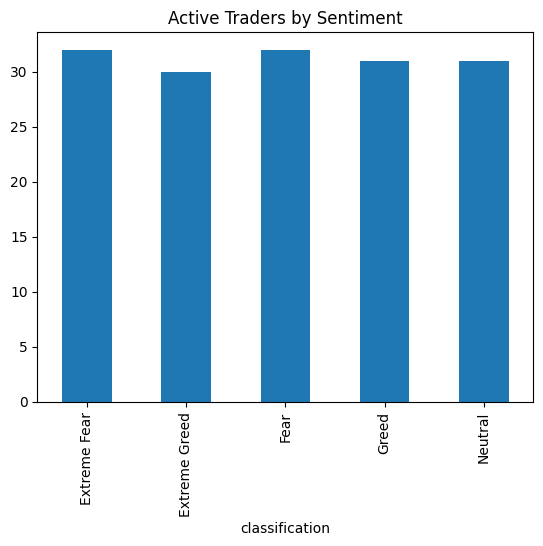

In [180]:
# Unique traders
merged_df.groupby('classification')['Account'].nunique().plot(kind='bar', title='Active Traders by Sentiment')
plt.show()

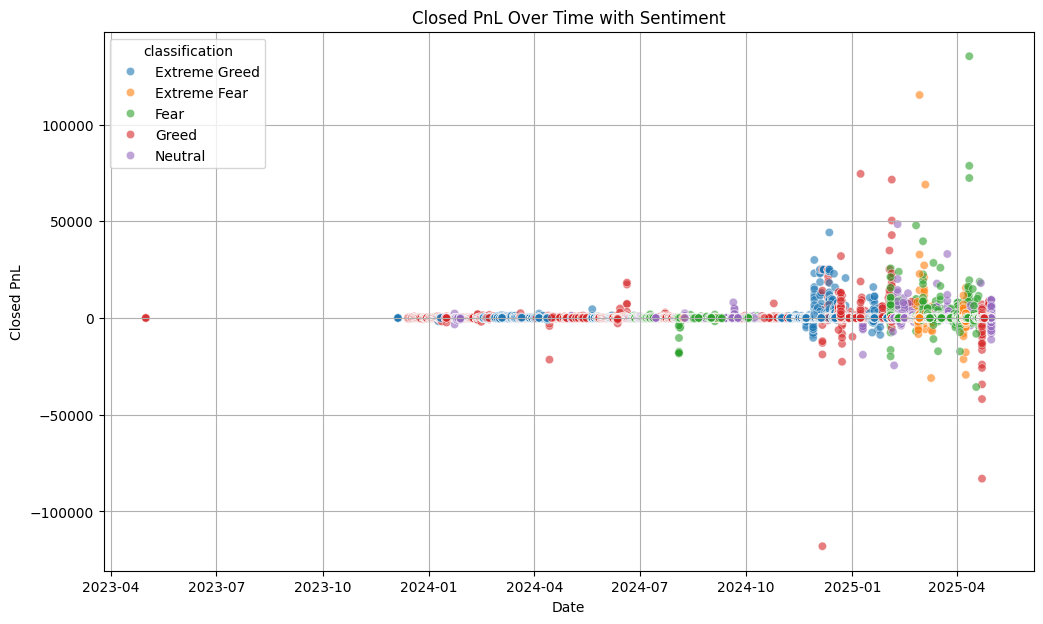

In [194]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=merged_df, x='Date', y='Closed PnL', hue='classification', alpha=0.6)
plt.title('Closed PnL Over Time with Sentiment')
plt.grid(True)
plt.show()

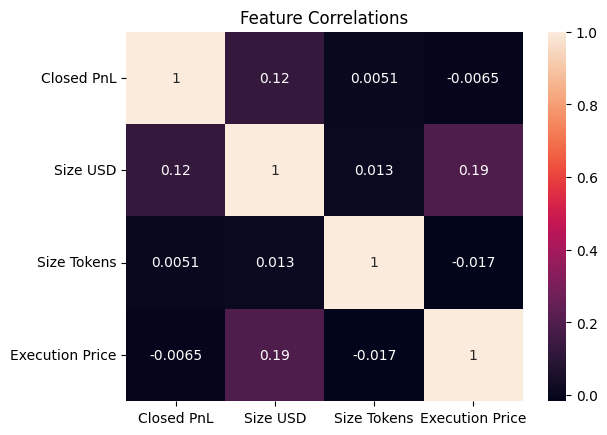

In [182]:
sns.heatmap(merged_df[['Closed PnL','Size USD','Size Tokens','Execution Price']].corr(), annot=True)
plt.title('Feature Correlations')
plt.show()


In [183]:
# Calculate the percentage of profitable trades within each sentiment classification
merged_df.groupby('classification')['Profit_Status'].value_counts(normalize=True)* 100

classification  Profit_Status
Extreme Fear    Loss             62.939252
                Profit           37.060748
Extreme Greed   Loss             53.505701
                Profit           46.494299
Fear            Loss             57.923250
                Profit           42.076750
Greed           Loss             61.517206
                Profit           38.482794
Neutral         Loss             60.300907
                Profit           39.699093
Name: proportion, dtype: float64

In [184]:
merged_df.groupby(['Side', 'classification'])['Closed PnL'].mean()

Side  classification
BUY   Extreme Fear       34.114627
      Extreme Greed      10.498927
      Fear               63.927104
      Greed              25.002302
      Neutral            29.227429
SELL  Extreme Fear       34.980106
      Extreme Greed     114.584643
      Fear               45.049641
      Greed              59.691091
      Neutral            39.456408
Name: Closed PnL, dtype: float64

In [201]:
merged_df.to_csv('merged_trader_sentiment_data.csv')

# **CONCLUSION**
 * In this analysis, we explored the relationship between Bitcoin market sentiment and trader performance using two datasets: the Bitcoin Market Sentiment Index and historical trade data from Hyperliquid. We successfully merged both datasets by aligning timestamps, enabling sentiment-wise analysis of trader behavior.

* Through exploratory data analysis and visualizations, we observed that average profitability tends to be higher during Greed periods, while Extreme Fear shows greater volatility and lower success rates. Interestingly, traders executed larger token quantities during Extreme Greed, yet their average USD exposure was lower, possibly indicating cheaper token prices or cautious capital deployment despite emotional confidence.

* Additionally, the number of trades and unique active traders increased during Greed days, suggesting heightened market activity driven by optimism or FOMO. A heatmap of correlations revealed relationships between trade size, price, and performance, while sentiment-wise win/loss ratios further validated how emotions influence trading outcomes.

* Overall, the analysis highlights how market sentiment directly impacts both trader decisions and profitability. These insights can be used to develop smarter, sentiment-aware trading strategies that account for emotional market phases rather than reacting impulsively.

